In [1]:
#!/root/.kaggle competitions download -c home-credit-default-risk

In [2]:
#!kaggle competitions download -c risk-management-uiim

In [3]:
#!pip install kaggle

In [4]:
#!unzip risk-management-uiim.zip

# At the bottom of NB one can find our second approach (and in next NB RandomForest.ipynb)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [294]:
df01 = pd.read_pickle('train_part1.pkl')
df02 = pd.read_pickle('train_part2.pkl')
df00 = df01.append(df02)

In [295]:
df00['x_13'].value_counts()

4     895330
1     541873
2      72587
5      16584
9       1059
3         30
19        28
Name: x_13, dtype: int64

In [304]:
df00.groupby('x_13')['TARGET'].mean()

DataError: No numeric types to aggregate

In [52]:

df1 = pd.read_pickle('train_part1.pkl')
df1.head()

,REPORT_DT,x_0,x_1,x_2,x_3,x_4,x_5,x_7,x_9,x_10,...,x_639,x_640,x_641,x_642,x_643,x_644,x_645,x_646,TARGET,ID
0,2019-08-25,1,0,1,1,2100000.0,1505828.87,1505828.87,2017-03-20,1400000.0,...,11.75,0.436268,0.436268,40.257001,28,22757.85,0.505730,0.716184,0,0
1,2019-06-27,1,0,1,1,900000.0,363535.29,363535.29,2017-02-02,900000.0,...,12.25,0.321785,0.321785,12.000000,28,20133.89,0.268452,0.268452,0,1
2,2018-01-09,1,0,1,1,1000000.0,990956.71,982069.19,2017-09-20,1000000.0,...,7.90,0.284704,0.284704,NaN,4,15536.44,0.154156,0.348582,0,2
3,2019-09-03,1,0,1,1,1400000.0,566338.60,564045.39,2015-02-06,1400000.0,...,15.75,0.274333,0.274333,16.470588,55,20318.31,0.239039,0.239039,0,3
4,2017-12-18,1,0,1,1,2114500.0,1414693.51,1396391.57,2014-10-13,1700000.0,...,13.00,0.382492,0.382492,16.700842,36,24772.97,0.190561,0.238575,0,4


In [53]:
df1.shape

(763801, 648)

In [3]:
df2 = pd.read_pickle('train_part2.pkl')
df2.head()

,REPORT_DT,x_0,x_1,x_2,x_3,x_4,x_5,x_7,x_9,x_10,...,x_639,x_640,x_641,x_642,x_643,x_644,x_645,x_646,TARGET,ID
971632,2018-11-29,1,0,1,1,1586000.0,370525.32,370525.32,2017-08-02,1600000.0,...,9.0,0.519917,0.519917,57.786131,14,14269.65,0.150207,0.515368,1,971632
971633,2018-03-12,1,0,1,1,2892000.0,828797.94,827507.87,2014-07-28,2892000.0,...,13.5,0.370445,0.370445,31.780198,43,33710.45,0.293134,0.396594,0,971633
971634,2019-03-31,1,0,1,1,1242200.0,683018.20,683018.20,2016-04-29,2200000.0,...,12.0,0.276360,0.276360,16.185670,35,17821.96,0.133000,0.131118,0,971634
971635,2017-11-19,1,0,1,1,405000.0,326739.23,326739.23,2016-06-28,405000.0,...,14.5,0.119566,0.119566,NaN,16,9528.95,0.105877,0.119566,0,971635
971636,2019-06-03,1,0,1,1,680000.0,608045.43,608045.43,2017-08-19,680000.0,...,8.9,0.347095,0.347095,NaN,20,8577.19,0.276684,0.347095,0,971636


In [4]:
df1.iloc[0,:].isna().sum()

216

In [8]:
df1_nans = df1.isna().sum().to_list()

In [9]:
df1_nans_idx = [i for i in range(len(df1_nans)) if df1_nans[i]!=0]

In [10]:
#df1_nans

In [11]:
#df1_nans_idx

In [12]:
len(df1_nans_idx)

591

In [13]:
df2_nans = df2.isna().sum().to_list()

df2_nans_idx = [i for i in range(len(df2_nans)) if df2_nans[i]!=0]

#df2_nans_idx

In [14]:
len(df1_nans_idx)

591

In [15]:
len(df2_nans_idx)

591

In [16]:
df1_nans_idx == df2_nans_idx

True

In [17]:
len(df1)

763801

In [18]:
len(df2)

763797

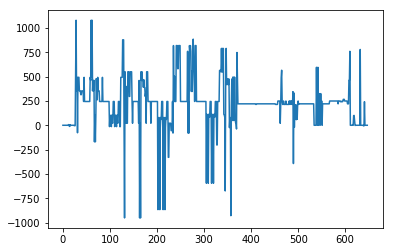

In [19]:
plt.plot(np.array(df2_nans)-np.array(df1_nans))

In [20]:
df_test = pd.read_pickle('test_data.pkl')
df_test.head()

,REPORT_DT,x_0,x_1,x_2,x_3,x_4,x_5,x_7,x_9,x_10,...,x_638,x_639,x_640,x_641,x_642,x_643,x_644,x_645,x_646,ID
1943531,2019-09-01,1,0,1,1,1100000.0,157773.90,157773.90,2014-10-25,1000000.0,...,0.0,13.75,0.530767,0.530767,34.517588,58,16914.35,0.583844,0.583844,1943531
1943532,2017-12-18,1,0,1,1,2580000.0,2187426.61,2183868.19,2017-08-17,2600000.0,...,0.0,9.00,0.735124,0.735124,71.603967,3,23212.93,0.356027,0.633954,1943532
1943533,2019-04-24,1,0,1,1,1200000.0,385763.26,218655.96,2013-02-07,1200000.0,...,0.0,14.00,0.858073,0.858073,NaN,73,18631.97,0.388166,0.858072,1943533
1943534,2017-05-15,1,0,1,1,637500.0,595369.13,595369.13,2015-11-16,637500.0,...,0.0,14.45,0.268572,0.268572,NaN,17,10071.45,0.402858,0.268572,1943534
1943537,2019-03-10,1,0,1,1,1232500.0,1118118.29,1118118.29,2014-03-24,1870000.0,...,15000.0,13.50,0.651646,0.651646,56.539372,56,14366.57,0.287331,0.471809,1943537


In [21]:
df_test_nans = df_test.isna().sum().to_list()

df_test_nans_idx = [i for i in range(len(df_test_nans)) if df_test_nans[i]!=0]

#df_test_nans_idx

In [22]:
len(df_test_nans_idx)

595

In [23]:
#df1['Nnans'] = df1.apply(lambda x: x.isna().sum(), axis=1)

In [24]:
#df1['Nnans'].hist()
#plt.show()

In [25]:
#df2['Nnans'] = df2.apply(lambda x: x.isna().sum(), axis=1)

#df2['Nnans'].hist()я
#plt.show()

In [26]:
#import numba

In [27]:
#pip install pandarallel

# Merging datasest and removing columns with>features

In [28]:
df = df1.append(df2)
df.shape

(1527598, 648)

In [29]:
from pandarallel import pandarallel
pandarallel.initialize(nb_workers = 32)

INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [30]:
def nans_counter_row(x):
    return x.isna().sum()

In [31]:
df['NnansParall'] = df.parallel_apply(nans_counter_row, axis=1)

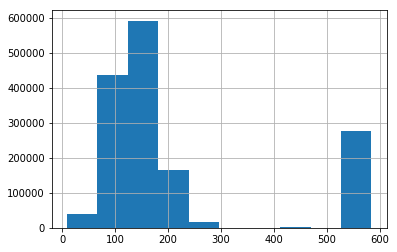

In [33]:
df['NnansParall'].hist()

In [34]:
nn = df.isna().sum()

In [35]:
features_dict = dict(zip(df.columns, nn))


In [36]:
columns_to_drop = {}

for elem in features_dict:
    if features_dict[elem]>=df1.shape[0]:
        columns_to_drop[elem] = features_dict[elem]
        #features_to_drop.append(features_dict[elem].keys())
        

In [37]:
features_to_drop = columns_to_drop.keys()
features_to_drop

dict_keys(['x_17', 'x_25', 'x_26', 'x_27', 'x_29', 'x_30', 'x_32', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_60', 'x_61', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_76', 'x_77', 'x_78', 'x_100', 'x_101', 'x_102', 'x_103', 'x_104', 'x_105', 'x_106', 'x_107', 'x_111', 'x_112', 'x_113', 'x_114', 'x_115', 'x_116', 'x_117', 'x_118', 'x_122', 'x_123', 'x_128', 'x_129', 'x_130', 'x_132', 'x_135', 'x_142', 'x_143', 'x_164', 'x_166', 'x_171', 'x_172', 'x_173', 'x_174', 'x_175', 'x_176', 'x_177', 'x_203', 'x_204', 'x_205', 'x_206', 'x_207', 'x_208', 'x_209', 'x_210', 'x_214', 'x_215', 'x_216', 'x_217', 'x_218', 'x_219', 'x_220', 'x_221', 'x_225', 'x_226', 'x_231', 'x_232', 'x_233', 'x_245', 'x_246', 'x_278', 'x_279', 'x_306', 'x_307', 'x_308', 'x_309', 'x_310', 'x_311', 'x_312', 'x_313', 'x_317', 'x_318', 'x_319', 'x_320', 'x_321', 'x_322', 'x_323', 'x_324', 'x_328', 'x_329', 'x_334', 'x_335', 'x_336', 'x_34

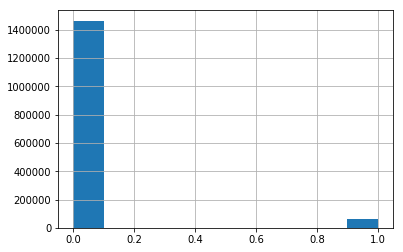

In [37]:
# imbalance? 

df['TARGET'].hist()

In [38]:
# do custom data preprocces
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
class DateTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
    # заменяю дату на месяц
        for i in range(X.shape[0]):
          X.date[i] = int(X.date[i][-1])
        return X

In [39]:
def dist(data, labels,idx):
    for i in idx:
        distance = []
        for j in range(len(labels)):
            distance.append(abs(data[i]-labels[j]))
        min_dist = min(distance)
        min_idx = distance.index(min_dist)
        data[i] = labels[min_idx]

In [40]:
class CatFeaturesToInt(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X["date"] = X["date"].astype(np.int) 
        X["build_tech"] = X["build_tech"].astype(np.int) 
        X["street_id"] = X["street_id"].astype(np.int) 
        return X

In [41]:
#!pip install -U scikit-learn

In [42]:
# кастомный класс для заполнения NaN через KNNimputation 
# ничего толкового из этого не вышло
from sklearn.impute import KNNImputer
class NaNImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        idx = np.array(X.index[X.isnull().any(axis=1)].tolist()) # индексы строк, в которых есть наны, чтобы прогонять цикл только по ним
        g_lift_unique = X.g_lift.unique()  # убираю наны из списка уникальных значений
        g_lift_unique = g_lift_unique[~np.isnan(g_lift_unique)]
        build_tech_unique = X.build_tech.unique()
        build_tech_unique = build_tech_unique[~np.isnan(build_tech_unique)]
        metro_dist_unique = X.metro_dist.unique()
        metro_dist_unique = metro_dist_unique[~np.isnan(metro_dist_unique)]
        imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean') # число соседей подобрал эмпирически
        filled_data = imputer.fit_transform(X.values)
        # работает импутер не до конца корректно и на бинарных признаках может давать промежуточные значения
        # подчищаю за импутером
        filled_df = pd.DataFrame(filled_data,columns=X.columns)
        dist(filled_df.g_lift,g_lift_unique,idx)
        dist(filled_df.build_tech,build_tech_unique,idx)
        dist(filled_df.metro_dist,metro_dist_unique,idx)
        return filled_df

In [43]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('transform_date', DateTransformer()),
    ('imputer',NaNImputer()),
    ('cat_feat_prepr',CatFeaturesToInt())
])
# X_train_prepared = pipeline.fit_transform(X_train)
# X_test_prepared = pipeline.fit_transform(X_test)


In [44]:
ls

Non-Linear-Classifier/  hack.ipynb                train_part1.pkl
RVM.py*                 risk-management-uiim.zip  train_part2.pkl
RVMReg.ipynb            submission.csv
__pycache__/            test_data.pkl


In [45]:
sub = pd.read_csv('submission.csv')
sub.head()

,ID,Probability
0,1943531,0.172594
1,1943532,0.535728
2,1943533,0.658073
3,1943534,0.321833
4,1943537,0.695918


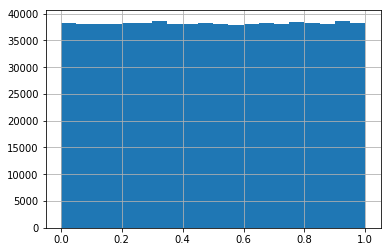

In [46]:
sub['Probability'].hist(bins=20)

# ebnev rf

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [48]:
FEATURES = ['x_0','x_1','x_2','x_3','x_4','x_5','x_7']

In [49]:
SEED = 42

In [50]:
X_train, X_val, y_train, y_val = train_test_split(df[FEATURES], df['TARGET'], test_size=0.25, random_state=SEED)

In [51]:
X_train.shape

(1145698, 7)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs = -1)
#clf = LogisticRegression(random_state=SEED)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

In [54]:
y_val_pred = clf.predict_proba(X_val)

In [55]:
y_val_pred[:,1]

array([1.56000794e-02, 5.04736020e-02, 6.59630607e-05, ...,
       3.83261227e-02, 4.35104788e-02, 5.15279578e-02])

In [56]:
#q = y_val.to_list()

In [57]:
roc_auc_score(y_val, y_val_pred[:,1])

0.6999680380451019

# Сделаем группировку неуплат по датам

In [274]:
df10 = pd.read_pickle('train_part1.pkl')

In [276]:
df10['REPORT_DT'] = df10['REPORT_DT'].astype('datetime64')

In [288]:
targetrate = df10.groupby(df10['REPORT_DT'].values.astype('<M8[M]'))['TARGET'].mean()

In [289]:
len(targetrate)

35

In [280]:
X=np.array(df1[FEATURES_ALL])

In [281]:
q = clf.predict(X)

In [282]:
set(q)

{0, 1}

In [283]:
df10['pred'] = q

In [284]:
q = df10.groupby(df10['REPORT_DT'].values.astype('<M8[M]'))['pred'].mean()

In [285]:
q

2017-01-01    0.000000
2017-02-01    0.000000
2017-03-01    0.000000
2017-04-01    0.000052
2017-05-01    0.000000
2017-06-01    0.000000
2017-07-01    0.000000
2017-08-01    0.000044
2017-09-01    0.000047
2017-10-01    0.000039
2017-11-01    0.000042
2017-12-01    0.000000
2018-01-01    0.000000
2018-02-01    0.000000
2018-03-01    0.000000
2018-04-01    0.000000
2018-05-01    0.000000
2018-06-01    0.000000
2018-07-01    0.000000
2018-08-01    0.000000
2018-09-01    0.000000
2018-10-01    0.000000
2018-11-01    0.000000
2018-12-01    0.000000
2019-01-01    0.000000
2019-02-01    0.000000
2019-03-01    0.000000
2019-04-01    0.000050
2019-05-01    0.000000
2019-06-01    0.000000
2019-07-01    0.000000
2019-08-01    0.000000
2019-09-01    0.000000
2019-10-01    0.000000
2019-11-01    0.000000
Name: pred, dtype: float64

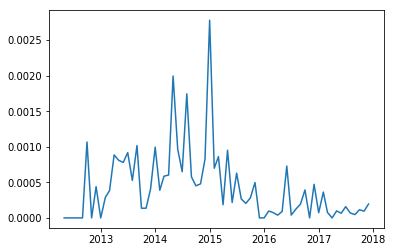

In [80]:
q0 = df.groupby(df['x_9'].values.astype('<M8[M]'))['TARGET'].mean()
q1 = df.groupby(df['x_9'].values.astype('<M8[M]'))['pred'].mean()
plt.plot(q1)

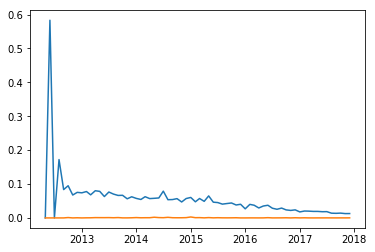

In [81]:
plt.plot(q0)
plt.plot(q1)

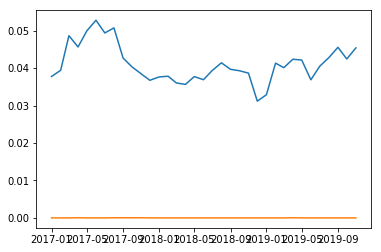

In [286]:
plt.plot(targetrate)
plt.plot(q)

# Чекнем чей-то рвм

In [67]:
!git clone https://github.com/karanchauhan/Non-Linear-Classifier.git

fatal: destination path 'Non-Linear-Classifier' already exists and is not an empty directory.


In [68]:
ls

Non-Linear-Classifier/  hack.ipynb                train_part1.pkl
RVM.py*                 risk-management-uiim.zip  train_part2.pkl
RVMReg.ipynb            submission.csv
__pycache__/            test_data.pkl


In [69]:
from RVM import *

In [70]:
rvc = RVC()

In [71]:
X=np.array(df[FEATURES])[:500]
y = np.array(df['TARGET'])[:500]



In [72]:
rvc.fit(X,y)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

RVC(alpha=1e-06, beta=1e-06, beta_fixed=False, bias_used=True, coef0=0.0,
    coef1=None, degree=3, kernel='rbf', n_iter=3000,
    threshold_alpha=1000000000.0, tol=0.001, verbose=False)

In [73]:
q1 = rvc.predict_proba(X)

#roc_auc_score(y, q1)

In [74]:
roc_auc_score(y, q1[:,1])

TypeError: tuple indices must be integers or slices, not tuple

# Finally, deleting thrash

In [38]:
# do custom data preprocces
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
class DateTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
    # заменяю дату на месяц
        for i in range(X.shape[0]):
            X.date[i] = int(X.date[i][-1])
        return X

In [39]:
def dist(data, labels,idx):
    for i in idx:
        distance = []
        for j in range(len(labels)):
            distance.append(abs(data[i]-labels[j]))
        min_dist = min(distance)
        min_idx = distance.index(min_dist)
        data[i] = labels[min_idx]

In [40]:
class CatFeaturesToInt(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X["date"] = X["date"].astype(np.int) 
        X["build_tech"] = X["build_tech"].astype(np.int) 
        X["street_id"] = X["street_id"].astype(np.int) 
        return X

In [41]:
#!pip install -U scikit-learn

In [42]:
# кастомный класс для заполнения NaN через KNNimputation 
# ничего толкового из этого не вышло
from sklearn.impute import KNNImputer
class NaNImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        idx = np.array(X.index[X.isnull().any(axis=1)].tolist()) # индексы строк, в которых есть наны, чтобы прогонять цикл только по ним
        g_lift_unique = X.g_lift.unique()  # убираю наны из списка уникальных значений
        g_lift_unique = g_lift_unique[~np.isnan(g_lift_unique)]
        build_tech_unique = X.build_tech.unique()
        build_tech_unique = build_tech_unique[~np.isnan(build_tech_unique)]
        metro_dist_unique = X.metro_dist.unique()
        metro_dist_unique = metro_dist_unique[~np.isnan(metro_dist_unique)]
        imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean') # число соседей подобрал эмпирически
        filled_data = imputer.fit_transform(X.values)
        # работает импутер не до конца корректно и на бинарных признаках может давать промежуточные значения
        # подчищаю за импутером
        filled_df = pd.DataFrame(filled_data,columns=X.columns)
        dist(filled_df.g_lift,g_lift_unique,idx)
        dist(filled_df.build_tech,build_tech_unique,idx)
        dist(filled_df.metro_dist,metro_dist_unique,idx)
        return filled_df

In [43]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('transform_date', DateTransformer()),
    ('imputer',NaNImputer()),
    ('cat_feat_prepr',CatFeaturesToInt())
])
# X_train_prepared = pipeline.fit_transform(X_train)
# X_test_prepared = pipeline.fit_transform(X_test)


In [75]:
features_to_drop

dict_keys(['x_17', 'x_25', 'x_26', 'x_27', 'x_29', 'x_30', 'x_32', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_60', 'x_61', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_76', 'x_77', 'x_78', 'x_100', 'x_101', 'x_102', 'x_103', 'x_104', 'x_105', 'x_106', 'x_107', 'x_111', 'x_112', 'x_113', 'x_114', 'x_115', 'x_116', 'x_117', 'x_118', 'x_122', 'x_123', 'x_128', 'x_129', 'x_130', 'x_132', 'x_135', 'x_142', 'x_143', 'x_164', 'x_166', 'x_171', 'x_172', 'x_173', 'x_174', 'x_175', 'x_176', 'x_177', 'x_203', 'x_204', 'x_205', 'x_206', 'x_207', 'x_208', 'x_209', 'x_210', 'x_214', 'x_215', 'x_216', 'x_217', 'x_218', 'x_219', 'x_220', 'x_221', 'x_225', 'x_226', 'x_231', 'x_232', 'x_233', 'x_245', 'x_246', 'x_278', 'x_279', 'x_306', 'x_307', 'x_308', 'x_309', 'x_310', 'x_311', 'x_312', 'x_313', 'x_317', 'x_318', 'x_319', 'x_320', 'x_321', 'x_322', 'x_323', 'x_324', 'x_328', 'x_329', 'x_334', 'x_335', 'x_336', 'x_34

In [76]:
df.select_dtypes('object')

,x_12,x_13,x_17,x_18,x_19,x_21,x_25,x_26,x_27,x_614,x_615,x_617,x_618,x_625,x_628,x_634
0,B1,4,None,Пн,1,Приобретение,None,None,None,1,1,4,Приобретение,living in city in apart,ЗП,0
1,B1,4,None,Чт,1,Приобретение,None,None,None,0,1,4,Приобретение,other,ЗП,0
2,D,1,None,Ср,0,Инвестирование,None,None,None,1,0,1,Инвестирование,living in city in apart,Улица,1
3,N,4,None,Пт,0,Приобретение,None,None,None,1,0,4,Приобретение,living in city in apart,Улица,1
4,A,1,None,Пн,0,Инвестирование,None,None,None,1,0,1,Инвестирование,living in city in apart,Сотрудники,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943522,D,1,None,Пн,0,Инвестирование,None,None,None,1,0,1,Инвестирование,living in city in apart,Улица,0
1943523,B1,4,None,Пн,1,Приобретение,None,None,None,0,1,4,Приобретение,other,ЗП,0
1943525,D,4,None,Пн,0,Приобретение,None,None,None,0,0,4,Приобретение,other,Улица,0
1943526,B1,4,None,Вт,0,Приобретение,None,None,None,1,0,4,Приобретение,living in city in apart,ЗП,0


In [77]:
for column in ['x_13', 'x_19', 'x_614', 'x_615', 'x_617', 'x_634']:
    pd.to_numeric(df[column])

In [78]:
description = df.describe()

std_stat = description.loc['std', :].values
features = df.select_dtypes(['float64', 'int64']).columns[std_stat == 0]

In [83]:
without_nan = features[df[features].isnull().sum() == 0]
with_nan = features[df[features].isnull().sum() != 0]

In [84]:
df.shape

(1527598, 650)

In [85]:
### first drop
df0 = df.drop(features_to_drop, axis=1)

In [86]:
df0.shape

(1527598, 495)

In [87]:
df0 = df0.drop(with_nan, axis=1)

In [88]:
df0.shape

(1527598, 482)

In [91]:
##datetime preprocces

df0['REPORT_DT'] = df0['REPORT_DT'].astype('datetime64')
df0['x_9'] = df0['x_9'].astype('datetime64')

In [92]:
df0['month_9'] = df0['x_9'].dt.month
df0['year_9'] = df0['x_9'].dt.year

In [93]:
df0['month_rep'] = df0['REPORT_DT'].dt.month
df0['year_rep'] = df0['REPORT_DT'].dt.year

In [98]:
df0['month_9'] = df0['month_9'].astype('int64')
df0['year_9'] = df0['year_9'].astype('int64')

df0['month_rep'] = df0['month_rep'].astype('int64')
df0['year_rep'] = df0['year_rep'].astype('int64')

In [94]:
df0.head()

,REPORT_DT,x_0,x_1,x_2,x_3,x_4,x_5,x_7,x_9,x_10,...,x_645,x_646,TARGET,ID,NnansParall,pred,month_9,year_9,month_rep,year_rep
0,2019-08-25,1,0,1,1,2100000.0,1505828.87,1505828.87,2017-03-20,1400000.0,...,0.505730,0.716184,0,0,216,0,3,2017,8,2019
1,2019-06-27,1,0,1,1,900000.0,363535.29,363535.29,2017-02-02,900000.0,...,0.268452,0.268452,0,1,140,0,2,2017,6,2019
2,2018-01-09,1,0,1,1,1000000.0,990956.71,982069.19,2017-09-20,1000000.0,...,0.154156,0.348582,0,2,581,0,9,2017,1,2018
3,2019-09-03,1,0,1,1,1400000.0,566338.60,564045.39,2015-02-06,1400000.0,...,0.239039,0.239039,0,3,136,0,2,2015,9,2019
4,2017-12-18,1,0,1,1,2114500.0,1414693.51,1396391.57,2014-10-13,1700000.0,...,0.190561,0.238575,0,4,123,0,10,2014,12,2017


In [95]:
df0 = df0.drop(['x_9', 'REPORT_DT'], axis = 1)

In [105]:
inv = df0['x_21']
inv.value_counts()

Приобретение                               1048421
Инвестирование                              447882
Рефинансирование                             14018
Индивидуальное строительство                  9206
Нецелевой кредит под залог недвижимости       8071
Name: x_21, dtype: int64

In [108]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(inv)
le.classes_

array(['Инвестирование', 'Индивидуальное строительство',
       'Нецелевой кредит под залог недвижимости', 'Приобретение',
       'Рефинансирование'], dtype=object)

In [109]:
q = le.transform(df0['x_21'])

In [111]:
df0['x_21'] = q
df0['x_21'] = df0['x_21'].astype('int64')

In [97]:
#the same as another one

df0.drop(columns=['x_617'], inplace=True)

In [120]:
df0['x_634'] = df0['x_634'].astype('int64')
df0['x_13'] = df0['x_13'].astype('int64')
df0['x_19'] = df0['x_19'].astype('int64')

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [116]:
df0['x_634'].value_counts()

0    1060486
1     467112
Name: x_634, dtype: int64

In [118]:
df0['x_19'].value_counts()

1    792426
0    735172
Name: x_19, dtype: int64

In [133]:
df0.select_dtypes('object').columns

Index(['x_12', 'x_13', 'x_18', 'x_618', 'x_625', 'x_628'], dtype='object')

In [123]:
df0['x_19'] = df0['x_19'].astype('int64')

In [125]:
df0['x_614'] = df0['x_614'].astype('int64')
df0['x_615'] = df0['x_615'].astype('int64')

In [131]:
df0['x_13'].isna().sum()

107

In [134]:
categorical_features = ['x_12', 'x_13', 'x_18', 'x_618', 'x_625', 'x_628']



In [138]:
from sklearn import preprocessing
from tqdm import tqdm
def cat_to_le(df, categs):
    for cat in tqdm(categs):
        inv = df[cat]
        #inv.value_counts()

 
        le = preprocessing.LabelEncoder()
        le.fit(inv)
        q = le.transform(df[cat])
        df[cat] = q
        df[cat]= df[cat].astype('int64')
    return df

In [139]:
df0 = cat_to_le(df0, categorical_features)

100%|██████████| 6/6 [01:08<00:00, 11.34s/it]


In [140]:
df0.select_dtypes('object')

""
0
1
2
3
4
...
1943522
1943523
1943525
1943526


In [143]:
idx = df0.isna().sum().to_list()

In [144]:
idx

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6842,
 6396,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 582020,
 582020,
 582020,
 582020,
 582020,
 279978,
 582020,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 582020,
 582020,
 582020,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 582020,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 582020,
 582020,
 582020,
 582020,
 652113,
 739907,
 652113,
 652113,
 652113,
 652113,
 739907,
 739907,
 739907,
 739907,
 739907,
 739907,
 739907,
 279978,
 652113,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 652113,
 757068,
 652113,
 739907,
 757068,
 739907,
 757068,
 652113,
 739907,
 739907,
 739907,
 279978,
 279978,
 279978,
 279978,
 279978,
 279978,
 652113,
 279978,
 279978,
 279978,
 

In [145]:
#DUPLICATES

description = df0.describe().transpose()

features = description.duplicated(subset=['mean', 'std', 'min', 'max'])

In [146]:
duplicates = df0.select_dtypes(['float64', 'int64']).columns[features]

In [147]:
duplicates

Index(['x_22', 'x_23', 'x_410', 'x_529', 'x_555', 'x_556', 'x_557', 'x_558',
       'x_560', 'x_563', 'x_564', 'x_565', 'x_574', 'x_582', 'x_583', 'x_608',
       'x_612', 'x_613', 'x_615', 'x_616', 'x_618', 'x_623', 'x_624', 'x_626',
       'x_641'],
      dtype='object')

In [148]:
df0 = df0.drop(columns= duplicates)

In [149]:
df0.shape

(1527598, 458)

In [ ]:
df0

In [2]:
FEATURES = ['x_0','x_1','x_2','x_3','x_4','x_5','x_7']



In [6]:
# 337 не брать

#features_to_drop= ['x_17', 'x_25', 'x_26', 'x_27', 'x_29', 'x_30', 'x_32', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_60', 'x_61', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_76', 'x_77', 'x_78', 'x_100', 'x_101', 'x_102', 'x_103', 'x_104', 'x_105', 'x_106', 'x_107', 'x_111', 'x_112', 'x_113', 'x_114', 'x_115', 'x_116', 'x_117', 'x_118', 'x_122', 'x_123', 'x_128', 'x_129', 'x_130', 'x_132', 'x_135', 'x_142', 'x_143', 'x_164', 'x_166', 'x_171', 'x_172', 'x_173', 'x_174', 'x_175', 'x_176', 'x_177', 'x_203', 'x_204', 'x_205', 'x_206', 'x_207', 'x_208', 'x_209', 'x_210', 'x_214', 'x_215', 'x_216', 'x_217', 'x_218', 'x_219', 'x_220', 'x_221', 'x_225', 'x_226', 'x_231', 'x_232', 'x_233', 'x_245', 'x_246', 'x_278', 'x_279', 'x_306', 'x_307', 'x_308', 'x_309', 'x_310', 'x_311', 'x_312', 'x_313', 'x_317', 'x_318', 'x_319', 'x_320', 'x_321', 'x_322', 'x_323', 'x_324', 'x_328', 'x_329', 'x_334', 'x_335', 'x_336', 'x_343', 'x_344', 'x_345', 'x_346', 'x_349', 'x_351', 'x_353', 'x_355', 'x_356', 'x_357', 'x_358', 'x_361', 'x_362', 'x_363', 'x_364', 'x_365', 'x_366', 'x_367', 'x_368', 'x_369', 'x_370', 'x_372', 'x_463', 'x_490', 'x_491', 'x_492', 'x_493', 'x_494', 'x_495', 'x_496', 'x_497', 'x_498', 'x_499', 'x_540', 'x_541', 'x_543', 'x_546', 'x_548', 'x_549', 'x_550', 'x_551', 'x_609']

In [10]:
FEATURES_ALL = ['x_0','x_1',
                'x_2','x_3','x_4','x_5','x_7',
                'month_9', 'year_9', 'month_rep', 'year_rep', 'x_12', 'x_13', 'x_18', 'x_618', 'x_625', 'x_628' ]
len(FEATURES_ALL)

17

In [293]:
df1['x_0'].value_counts() # drop nahui

1    763801
Name: x_0, dtype: int64

In [291]:
df1['x_11'].isna().sum()

0

In [305]:
df00.groupby('x_12')['TARGET'].mean() #x_12 credit history rating

x_12
A     0.030955
A1    0.018381
B     0.043212
B1    0.034102
C     0.051913
D     0.049693
N     0.058373
Name: TARGET, dtype: float64

In [307]:
df00['x_12'].value_counts() 

B1    776279
D     636008
A      50396
C      31649
N      21140
B      10113
A1      2013
Name: x_12, dtype: int64

In [310]:
df00.groupby(df00['x_12'])['x_14'].mean()

x_12
A     30.899595
A1    32.819175
B     34.125680
B1    35.698903
C     34.322569
D     36.302883
N     35.140208
Name: x_14, dtype: float64

In [311]:
df00['x_0'].value_counts()

1    1527598
Name: x_0, dtype: int64

In [315]:
df00['x_2'].value_counts()

1    1500200
2      26073
3       1106
4        219
Name: x_2, dtype: int64

In [316]:
df00.groupby('x_2')['TARGET'].mean()

x_2
1    0.041231
2    0.040272
3    0.072333
4    0.018265
Name: TARGET, dtype: float64

(0, 10000000.0)

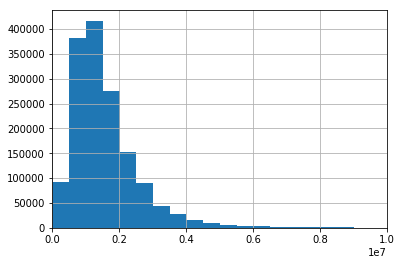

In [327]:
df00['x_4'].hist(bins=100)
plt.xlim((0, 1e7))

In [ ]:
df

INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


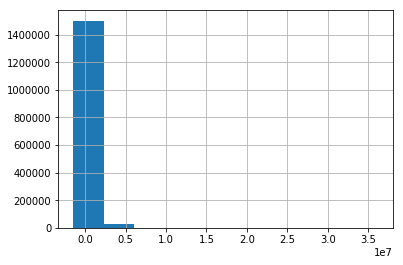

In [334]:
from pandarallel import pandarallel
pandarallel.initialize(nb_workers = 32)

def nans_counter_row(x,y):
    return x-y

df00['x4-x5'] = df00[['x_4', 'x_5']].parallel_apply(lambda x: x[0] - x[1], axis=1)

df00['x4-x5'].hist()

(0, 10000000.0)

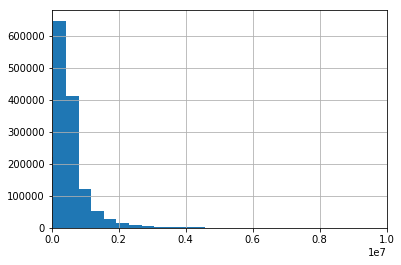

In [336]:
df00['x4-x5'].hist(bins = 100)
plt.xlim((0, 1e7))

In [339]:
df00.groupby('TARGET')['x4-x5'].mean()

TARGET
0    471169.297544
1    367900.337676
Name: x4-x5, dtype: float64

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


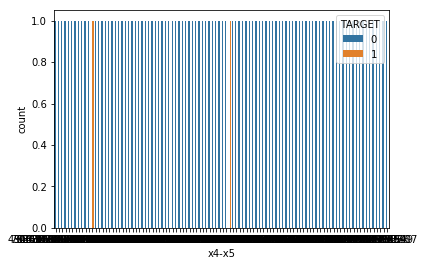

In [338]:
sns.countplot(df00['x4-x5'][:100], hue = df00['TARGET'][:100])

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


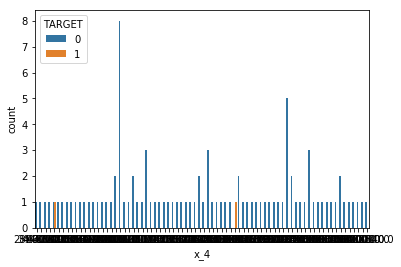

In [332]:
sns.countplot(df00['x_4'][:100], hue = df00['TARGET'][:100])

In [320]:
df00.groupby('x_3')['TARGET'].mean()

x_3
0    0.000000
1    0.041646
2    0.041011
3    0.072744
4    0.018779
Name: TARGET, dtype: float64

In [342]:
df00.groupby('x_317')['TARGET'].mean()

x_317
0.0    0.044774
1.0    0.099142
Name: TARGET, dtype: float64

In [343]:
import seaborn as sns

In [330]:
#x_0 - бросатьи 
#x_1 -> drop
#x_2 -> похоже на комнатность квартир, выгляд логично, что спадает число
#x_3 - хз что, пока не берем, особо не влияет
#x5-x4 возможен инсайд, но пока хз
# x6 - хз
#x5 and x7 lin dependent, so let's took x5
#x_11 -  месяцы заема -> в годы НЕ БРАЛ
#x_12 -- походу рейтинг^ 
#x_13 -> число комнат, object БРАЛ

#x_317 - hren
#x_292 - заполнить походу надо, но вроде полезно, но пока не берем
# x_492 посмотрим потом
# delta      int64
# сделать дельту

In [312]:
d1 = pd.DatetimeIndex(df00['REPORT_DT'].values.astype('<M8[M]'))
d0=pd.DatetimeIndex(df00['x_9'].values.astype('<M8[M]'))
delta = d1 - d0
# print(delta.days)
# data_p1['delta']=delta.days
# data_p1
delta

TimedeltaIndex([ '883 days',  '850 days',  '122 days', '1673 days',
                '1157 days',   '61 days', '1248 days', '2222 days',
                 '579 days', '1675 days',
                ...
                '1584 days',  '792 days',  '669 days',  '854 days',
                 '821 days',  '518 days', '1918 days', '1645 days',
                 '396 days',  '791 days'],
               dtype='timedelta64[ns]', length=1527598, freq=None)

In [314]:
#delta.value_counts()

In [347]:
df00['x_292'].isna().sum()

279978

In [346]:
df00.groupby('x_292')['TARGET'].mean()

x_292
0.0     0.026876
1.0     0.055572
2.0     0.084859
3.0     0.096751
4.0     0.122288
5.0     0.139896
6.0     0.145507
7.0     0.163153
8.0     0.159955
9.0     0.124717
10.0    0.207595
11.0    0.121951
12.0    0.121212
13.0    0.000000
14.0    0.416667
Name: TARGET, dtype: float64

In [351]:
df00['x_618'].value_counts()

Приобретение                               1048421
Инвестирование                              447882
Рефинансирование                             14018
Индивидуальное строительство                  9206
Нецелевой кредит под залог недвижимости       8071
Name: x_618, dtype: int64

In [350]:
df00.groupby('x_618')['TARGET'].mean()

x_618
Инвестирование                             0.028420
Индивидуальное строительство               0.086683
Нецелевой кредит под залог недвижимости    0.063189
Приобретение                               0.046559
Рефинансирование                           0.009916
Name: TARGET, dtype: float64

In [352]:
df00['x_625'].value_counts()



living in city in apart    995998
other                      531600
Name: x_625, dtype: int64

In [353]:
df00.groupby('x_625')['TARGET'].mean()

x_625
living in city in apart    0.036522
other                      0.050062
Name: TARGET, dtype: float64

In [357]:
df00['x_627'].isna().sum()

0

In [354]:
df00['x_628'].value_counts()



ЗП            788405
Улица         688797
Сотрудники     50396
Name: x_628, dtype: int64

In [358]:
df00['x_628'].isna().sum()

0

In [355]:
df00.groupby('x_628')['TARGET'].mean()

x_628
ЗП            0.034179
Сотрудники    0.030955
Улица         0.050061
Name: TARGET, dtype: float64

In [377]:
df00['month'] = df00['x_9'].dt.month

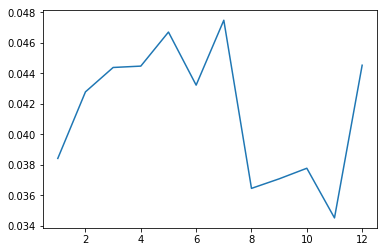

In [381]:
plt.plot(df00.groupby(df00['month'])['TARGET'].mean())

In [380]:
df00['year'] = df00['x_9'].dt.year

In [382]:
import typing as t

In [386]:
autumn = [9, 10, 11]
winter = [12, 1, 2]
spring = [3, 4, 5]
summer = [6, 7, 8] 
import typing as t
def get_season(value: t.Iterable) -> str:
    if value in autumn:
        return 'autumn'
    elif value in winter:
        return 'winter'
    elif value in spring:
        return 'spring'
    else:
        return 'summer'

In [387]:
df00['seasons'] = df00['month'].apply(get_season)

In [ ]:
FEATURES_ALL = ['x_0','x_1',
                'x_2','x_3','x_4','x_5','x_7',
                'month_9', 'year_9', 'month_rep', 'year_rep', 'x_12', 'x_13', 'x_18', 'x_618', 'x_625', 'x_628' ]

In [372]:
FEATURES_ALL_NEW = ['x_2','x_3','x_4','x_5',
                'seasons', 'year', 'month_rep', 'year_rep', 'x_11', 'x_12', 'x_13', 'x_11', 'x_625', 'x_628', 'x_627' ]

In [373]:
features_DM = ['x_2',
 'x_3',
 'x_4',
 'x_5',
 'x_7',
 'year',
 'x_11', # months of credit (duration)
 'x_625',
 'seasons',
 'ЗП',
 'Сотрудники',
 'Улица',
 'eldery', # x_13
 'normal',
 'youth',
 'A', # x_12
 'A1',
 'B',
 'B1',
 'C',
 'D',
 'N']

In [374]:
df00['x_11'].value_counts()

120    396567
180    372899
240    324479
144     80277
60      62433
        ...  
306         8
271         8
325         2
303         2
307         1
Name: x_11, Length: 338, dtype: int64

In [375]:
df00[FEATURES_ALL_NEW].isna().sum()

KeyError: "['month_9', 'month_rep', 'year_rep', 'year_9'] not in index"

In [ ]:
x_618      int64
x_628      int64
x_13       int64

x_317    float64
x_286    float64

x_189    float64
x_321    float64
x_291    float64
x_63     float64
x_85     float64
x_124    float64
x_421    float64
x_183    float64
x_111    float64
x_100    float64




In [11]:
features_to_drop = ['x_17', 'x_25', 'x_26', 'x_27', 'x_29', 'x_30', 'x_32', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_60', 'x_61', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_76', 'x_77', 'x_78', 'x_100', 'x_101', 'x_102', 'x_103', 'x_104', 'x_105', 'x_106', 'x_107', 'x_111', 'x_112', 'x_113', 'x_114', 'x_115', 'x_116', 'x_117', 'x_118', 'x_122', 'x_123', 'x_128', 'x_129', 'x_130', 'x_132', 'x_135', 'x_142', 'x_143', 'x_164', 'x_166', 'x_171', 'x_172', 'x_173', 'x_174', 'x_175', 'x_176', 'x_177', 'x_203', 'x_204', 'x_205', 'x_206', 'x_207', 'x_208', 'x_209', 'x_210', 'x_214', 'x_215', 'x_216', 'x_217', 'x_218', 'x_219', 'x_220', 'x_221', 'x_225', 'x_226', 'x_231', 'x_232', 'x_233', 'x_245', 'x_246', 'x_278', 'x_279', 'x_306', 'x_307', 'x_308', 'x_309', 'x_310', 'x_311', 'x_312', 'x_313', 'x_317', 'x_318', 'x_319', 'x_320', 'x_321', 'x_322', 'x_323', 'x_324', 'x_328', 'x_329', 'x_334', 'x_335', 'x_336', 'x_343', 'x_344', 'x_345', 'x_346', 'x_349', 'x_351', 'x_353', 'x_355', 'x_356', 'x_357', 'x_358', 'x_361', 'x_362', 'x_363', 'x_364', 'x_365', 'x_366', 'x_367', 'x_368', 'x_369', 'x_370', 'x_372', 'x_463', 'x_490', 'x_491', 'x_492', 'x_493', 'x_494', 'x_495', 'x_496', 'x_497', 'x_498', 'x_499', 'x_540', 'x_541', 'x_543', 'x_546', 'x_548', 'x_549', 'x_550', 'x_551', 'x_609']

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
def cat_to_le(df, categs):
    for cat in tqdm(categs):
        inv = df[cat]
        #inv.value_counts()

 
        le = preprocessing.LabelEncoder()
        le.fit(inv)
        q = le.transform(df[cat])
        df[cat] = q
        df[cat]= df[cat].astype('int64')
    return df

In [13]:
def dataset_preproc(df, features_to_drop = features_to_drop):
    
    df = df.drop(columns = features_to_drop, axis = 1)
    for column in ['x_19', 'x_614', 'x_615', 'x_617', 'x_634']:
        pd.to_numeric(df[column])
    
    description = df.describe()

    std_stat = description.loc['std', :].values
    features = df.select_dtypes(['float64', 'int64']).columns[std_stat == 0]

    without_nan = features[df[features].isnull().sum() == 0]
    with_nan = features[df[features].isnull().sum() != 0]
    
    df = df.drop(with_nan, axis=1)

    df.shape

    ##datetime preprocces

    df['REPORT_DT'] = df['REPORT_DT'].astype('datetime64')
    df['x_9'] = df['x_9'].astype('datetime64')

    df['month_9'] = df['x_9'].dt.month
    df['year_9'] = df['x_9'].dt.year

    df['month_rep'] = df['REPORT_DT'].dt.month
    df['year_rep'] = df['REPORT_DT'].dt.year

    df['month_9'] = df['month_9'].astype('int64')
    df['year_9'] = df['year_9'].astype('int64')

    df['month_rep'] = df['month_rep'].astype('int64')
    df['year_rep'] = df['year_rep'].astype('int64')
    df = df.drop(['x_9', 'REPORT_DT'], axis = 1)
    
    #df['x_19'] = df['x_19'].astype('int64')

    #df['x_614'] = df['x_614'].astype('int64')
    #df['x_615'] = df['x_615'].astype('int64')
    categorical_features = ['x_12', 'x_13', 'x_18', 'x_618', 'x_625', 'x_628']
    df = cat_to_le(df, categorical_features)
    
    #DUPLICATES

    description = df.describe().transpose()

    features = description.duplicated(subset=['mean', 'std', 'min', 'max'])

    duplicates = df.select_dtypes(['float64', 'int64']).columns[features]

    df = df.drop(columns= duplicates, axis = 1)
    
    return df

In [14]:
def date_pars(df):
    df['REPORT_DT'] = df['REPORT_DT'].astype('datetime64')
    df['x_9'] = df['x_9'].astype('datetime64')

    df['month_9'] = df['x_9'].dt.month
    df['year_9'] = df['x_9'].dt.year

    df['month_rep'] = df['REPORT_DT'].dt.month
    df['year_rep'] = df['REPORT_DT'].dt.year

    df['month_9'] = df['month_9'].astype('int64')
    df['year_9'] = df['year_9'].astype('int64')
    return df

In [15]:
#df1 = pd.read_pickle('train_part1.pkl')
df1 = pd.read_pickle('data1.pkl')

In [8]:
len(df1)

NameError: name 'df1' is not defined

In [59]:
#df1 = dataset_preproc(df1)

100%|██████████| 6/6 [00:03<00:00,  1.74it/s]


In [60]:
len(df1)

763801

In [154]:
df1['x_13'].isna().sum()

0

In [61]:
#df1.to_pickle('data1.pkl')

In [216]:
#df2 = pd.read_pickle('train_part2.pkl')
df2 = pd.read_pickle('data2.pkl')


In [50]:
#df2 = dataset_preproc(df2)

100%|██████████| 6/6 [00:03<00:00,  1.66it/s]


In [51]:
#df2.to_pickle('data2.pkl')

In [15]:
#df2['year_9'].value_counts()

In [53]:
ls

Non-Linear-Classifier/  __pycache__/  hack.ipynb                test_data.pkl
RVM.py*                 data1.pkl     risk-management-uiim.zip  train_part1.pkl
RVMReg.ipynb            data2.pkl     submission.csv            train_part2.pkl


In [16]:
#test = pd.read_pickle('test_data.pkl')
test = pd.read_pickle('test.pkl')

In [17]:
len(test)

763809

In [64]:
#test = dataset_preproc(test)

100%|██████████| 6/6 [00:03<00:00,  1.64it/s]


In [65]:
len(test)

763809

In [66]:
#test.to_pickle('test.pkl')

In [167]:
# test = date_pars(test)

# test.head()

In [168]:
#test['month_9'].value_counts()

In [169]:
#test['year_9'].value_counts()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [19]:
SEED = 42

In [129]:
X_train, X_val, y_train, y_val = train_test_split(df1[FEATURES_ALL], df1['TARGET'], test_size=0.25, random_state=SEED)

In [130]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [131]:
X_val = scaler.transform(X_val)

In [132]:
X_train.shape

(572850, 17)

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
#clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs = -1)
clf = LogisticRegression(random_state=SEED, solver = 'liblinear', C=1000, max_iter=50, n_jobs=-1) #penalty='l2'
#clf = LogisticRegression(random_state=SEED, solver = 'sag', C=10, max_iter=100, n_jobs=-1)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1357: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1000, max_iter=50, n_jobs=-1, random_state=42,
                   solver='liblinear')

In [146]:
y_val_pred = clf.predict_proba(X_val)

In [147]:
y_val_pred[:,1]

array([7.16187705e-07, 5.80028139e-07, 4.68903777e-02, ...,
       7.82449345e-03, 7.94144180e-03, 5.13546757e-03])

In [148]:
#q = y_val.to_list()

In [149]:
roc_auc_score(y_val, y_val_pred[:,1])

0.840910593546906

In [150]:
clf.coef_

array([[ 0.00000000e+00,  0.00000000e+00, -1.25407455e+00,
         1.52666809e+00, -8.17997087e-01, -5.23092587e+02,
         5.21599376e+02, -1.12622433e-01, -6.22476373e-01,
         1.11448142e-01,  1.16462830e-01,  1.27699904e-01,
        -6.49729021e-02, -4.30571101e-03,  1.23294812e-01,
         9.22658677e-02,  5.68872399e-02]])

In [76]:
# #clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs = -1)
# X_train, X_val, y_train, y_val = train_test_split(df1[FEATURES_ALL], df1['TARGET'], test_size=0.25, random_state=SEED)
# clf2 = LogisticRegression(random_state=SEED, C=1, max_iter=500, n_jobs=-1, solver = 'saga')
# clf2.fit(X_train, y_train)

# y_val_pred = clf2.predict_proba(X_val)

# y_val_pred[:,1]

# #q = y_val.to_list()

# roc_auc_score(y_val, y_val_pred[:,1])

In [77]:
X_test = np.array(test[FEATURES_ALL])

X_test.shape

(763809, 17)

In [78]:
X_test = scaler.transform(X_test)

In [79]:
q = clf.predict_proba(X_test)

In [80]:
len(q)

763809

In [81]:
ls

Non-Linear-Classifier/  data2.pkl                 submission22.csv
RVM.py*                 hack.ipynb                test.pkl
RVMReg.ipynb            risk-management-uiim.zip  test_data.pkl
__pycache__/            sub2.csv                  train_part1.pkl
data1.pkl               submission.csv            train_part2.pkl


In [82]:
sub = pd.read_csv('submission.csv')
sub.head()

,ID,Probability
0,1943531,0.172594
1,1943532,0.535728
2,1943533,0.658073
3,1943534,0.321833
4,1943537,0.695918


In [83]:
len(sub)

763809

In [84]:
sub['Probability'] = q[:,1]
sub.head()

,ID,Probability
0,1943531,9.353642e-02
1,1943532,9.860573e-03
2,1943533,1.481581e-39
3,1943534,6.148672e-02
4,1943537,2.133411e-01


In [85]:
sub.to_csv('submission84.csv',index=False)

## Simple boosting

In [164]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier(loss= 'deviance', criterion = 'mse', n_estimators=100, learning_rate=0.01,
    max_depth=12, random_state=SEED, verbose=1).fit(X_train, y_train)



      Iter       Train Loss   Remaining Time 
         1           0.3381            8.53m
         2           0.3367            8.17m
         3           0.3353            8.18m
         4           0.3340            8.11m
         5           0.3328            8.01m
         6           0.3318            7.95m
         7           0.3307            7.86m
         8           0.3297            7.76m
         9           0.3286            7.72m
        10           0.3276            7.66m
        20           0.3194            6.90m
        30           0.3124            6.09m
        40           0.3061            5.21m
        50           0.3004            4.34m
        60           0.2952            3.37m
        70           0.2897            2.42m
        80           0.2850            1.66m
        90           0.2806           50.97s
       100           0.2769            0.00s


In [165]:
y_val_pred = clf.predict_proba(X_val)



In [166]:
roc_auc_score(y_val, y_val_pred[:,1])

0.7583006108876147

In [85]:
ls

Non-Linear-Classifier/  data2.pkl                 test.pkl
RVM.py*                 hack.ipynb                test_data.pkl
RVMReg.ipynb            risk-management-uiim.zip  train_part1.pkl
__pycache__/            sub2.csv                  train_part2.pkl
data1.pkl               submission.csv


# Not so stupid boosting

# Handling imbalance in logreg

In [167]:
weights = {0:1.0, 1:100.0}

In [168]:
X_train, X_val, y_train, y_val = train_test_split(df1[FEATURES_ALL], df1['TARGET'], test_size=0.25, random_state=SEED)

In [169]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [170]:
X_val = scaler.transform(X_val)

In [171]:
X_train.shape

(572850, 17)

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
#clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs = -1)
clf = LogisticRegression(random_state=SEED, solver = 'liblinear', C=10000, max_iter=100, n_jobs=-1, 
                         class_weight = 'balanced', verbose=1) #penalty='l2'
#clf = LogisticRegression(random_state=SEED, solver = 'sag', C=10, max_iter=100, n_jobs=-1)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1357: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

LogisticRegression(C=10000, class_weight='balanced', n_jobs=-1, random_state=42,
                   solver='liblinear', verbose=1)

In [212]:
y_val_pred = clf.predict_proba(X_val)

In [213]:
y_val_pred[:,1]

array([5.14361969e-05, 4.49306757e-05, 4.87036826e-01, ...,
       1.82707361e-01, 1.68301164e-01, 1.26789806e-01])

In [214]:
#q = y_val.to_list()

In [215]:
roc_auc_score(y_val, y_val_pred[:,1])

0.8381474780132385

In [201]:
#targetrate

X = df1[FEATURES_ALL]
y = df1['TARGET']

y_pred = clf.predict(X)

In [202]:
df1['pred'] = y_pred



In [203]:
df1['REPORT_DT'] = df1['REPORT_DT'].astype('datetime64')

KeyError: 'REPORT_DT'

In [204]:
df1

,x_0,x_1,x_2,x_3,x_4,x_5,x_7,x_10,x_11,x_12,...,x_644,x_645,x_646,TARGET,ID,month_9,year_9,month_rep,year_rep,pred
0,1,0,1,1,2100000.00,1505828.87,1505828.87,1400000.0,240,3,...,22757.85,0.505730,0.716184,0,0,3,2017,8,2019,0
1,1,0,1,1,900000.00,363535.29,363535.29,900000.0,60,3,...,20133.89,0.268452,0.268452,0,1,2,2017,6,2019,0
2,1,0,1,1,1000000.00,990956.71,982069.19,1000000.0,84,5,...,15536.44,0.154156,0.348582,0,2,9,2017,1,2018,0
3,1,0,1,1,1400000.00,566338.60,564045.39,1400000.0,180,6,...,20318.31,0.239039,0.239039,0,3,2,2015,9,2019,0
4,1,0,1,1,2114500.00,1414693.51,1396391.57,1700000.0,240,0,...,24772.97,0.190561,0.238575,0,4,10,2014,12,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971623,1,0,1,1,1117098.61,733851.20,733851.20,1115000.0,180,5,...,14318.26,0.193490,0.365728,0,971623,4,2014,7,2018,0
971624,1,0,1,1,1670000.00,1327497.45,1131818.19,1666800.0,264,0,...,16704.09,0.451462,0.300975,0,971624,5,2017,12,2018,0
971628,1,0,1,1,1022000.00,113893.44,113893.44,1320000.0,180,3,...,14129.19,0.523303,0.801371,0,971628,9,2015,6,2019,0
971630,1,0,1,1,2100000.00,1986766.32,1983202.53,2500000.0,227,5,...,24175.15,0.302189,0.449951,0,971630,10,2016,9,2019,0


In [205]:
targetrate = df1.groupby(df1['month_rep'].values.astype('<M8[M]'))['TARGET'].mean()

In [208]:
q = df1.groupby(df1['month_rep'].values.astype('<M8[M]'))['pred'].mean()

In [209]:
q

1970-02-01    0.000000
1970-03-01    0.000000
1970-04-01    0.000000
1970-05-01    0.000032
1970-06-01    0.000000
1970-07-01    0.000000
1970-08-01    0.000000
1970-09-01    0.000016
1970-10-01    0.000015
1970-11-01    0.000015
1970-12-01    0.000016
1971-01-01    0.000000
Name: pred, dtype: float64

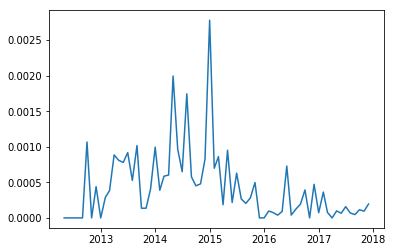

In [80]:
q0 = df.groupby(df['x_9'].values.astype('<M8[M]'))['TARGET'].mean()
q1 = df.groupby(df['x_9'].values.astype('<M8[M]'))['pred'].mean()
plt.plot(q1)

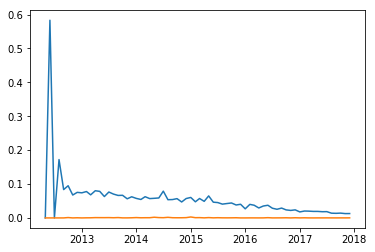

In [81]:
plt.plot(q0)
plt.plot(q1)

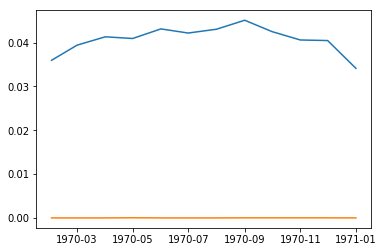

In [210]:
plt.plot(targetrate)
plt.plot(q)

In [217]:
df22 = df2[df2.TARGET == 1]

In [219]:
len(df22)/len(df2)

0.04153328698593998

In [220]:
df12 = df1.append(df22)

In [221]:
weights = {0:1.0, 1:100.0}

In [222]:
X_train, X_val, y_train, y_val = train_test_split(df12[FEATURES_ALL], df12['TARGET'], test_size=0.15, random_state=SEED)

In [223]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [224]:
X_val = scaler.transform(X_val)

In [225]:
X_train.shape

(676195, 17)

In [226]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
#clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs = -1)
clf = LogisticRegression(random_state=SEED, solver = 'liblinear', C=2000, max_iter=150, n_jobs=-1, 
                         class_weight = 'balanced', verbose=1) #penalty='l2'
#clf = LogisticRegression(random_state=SEED, solver = 'sag', C=10, max_iter=100, n_jobs=-1)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1357: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

LogisticRegression(C=2000, class_weight='balanced', max_iter=150, n_jobs=-1,
                   random_state=42, solver='liblinear', verbose=1)

In [243]:
y_val_pred = clf.predict_proba(X_val)

In [244]:
y_val_pred[:,1]

array([0.62889771, 0.62777505, 0.61096956, ..., 0.16842229, 0.69049665,
       0.51673634])

In [245]:
#q = y_val.to_list()

In [246]:
roc_auc_score(y_val, y_val_pred[:,1])

0.8411799853544675

In [247]:
#roc_auc_score(y_val, y_val_pred[:,1])

In [248]:
X_test = np.array(test[FEATURES_ALL])

X_test.shape

(763809, 17)

In [249]:
X_test = scaler.transform(X_test)

In [250]:
q = clf.predict_proba(X_test)

In [251]:
len(q)

763809

In [252]:
sub = pd.read_csv('submission.csv')
sub.head()

,ID,Probability
0,1943531,0.172594
1,1943532,0.535728
2,1943533,0.658073
3,1943534,0.321833
4,1943537,0.695918


In [253]:
len(sub)

763809

In [254]:
sub['Probability'] = q[:,1]
sub.head()

,ID,Probability
0,1943531,7.005866e-01
1,1943532,2.087309e-01
2,1943533,6.121548e-34
3,1943534,5.565168e-01
4,1943537,8.443053e-01


In [255]:
sub.to_csv('submission84_balanced.csv',index=False)

In [41]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:         515875      243543      242365        3917       29966      265083
Swap:             0           0           0


# EDM

In [102]:
df0.groupby('x_21')['TARGET'].mean()

x_21
Инвестирование                             0.028420
Индивидуальное строительство               0.086683
Нецелевой кредит под залог недвижимости    0.063189
Приобретение                               0.046559
Рефинансирование                           0.009916
Name: TARGET, dtype: float64

In [103]:
df0.groupby('year_9')['TARGET'].mean()

year_9
2012    0.076754
2013    0.069263
2014    0.057858
2015    0.046184
2016    0.029541
2017    0.016679
Name: TARGET, dtype: float64

In [104]:
df0.groupby('year_rep')['TARGET'].mean()

year_rep
2017    0.044461
2018    0.038145
2019    0.041418
Name: TARGET, dtype: float64

# IMPORTANT

# NEW FEATURES EXPERIMENTS

In [1]:
FEATURES_ALL_NEW = ['x_2','x_3','x_4','x_5',
                'seasons', 'year', 'month', 
                    'x_11', 'x_12', 'x_13',  'x_625', 'x_627', 'x_628']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df01 = pd.read_pickle('train_part1.pkl')
df02 = pd.read_pickle('train_part2.pkl')

df00 = df01.append(df02)
del df01
del df02

In [4]:
Y = df00["TARGET"].copy()

In [5]:
df00.shape

(1527598, 648)

In [6]:
test = pd.read_pickle('test_data.pkl')

In [7]:
test.shape

(763809, 647)

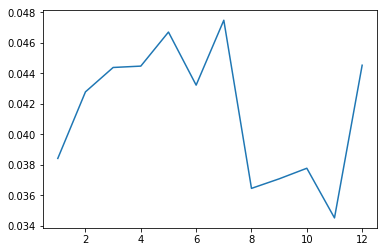

In [8]:
df00['month'] = df00['x_9'].dt.month

plt.plot(df00.groupby(df00['month'])['TARGET'].mean())

df00['year'] = df00['x_9'].dt.year

import typing as t

autumn = [9, 10, 11]
winter = [12, 1, 2]
spring = [3, 4, 5]
summer = [6, 7, 8] 
import typing as t
def get_season(value: t.Iterable) -> str:
    if value in autumn:
        return 'autumn'
    elif value in winter:
        return 'winter'
    elif value in spring:
        return 'spring'
    else:
        return 'summer'

df00['seasons'] = df00['month'].apply(get_season)

In [9]:
test['month'] = test['x_9'].dt.month


test['year'] = test['x_9'].dt.year

import typing as t

autumn = [9, 10, 11]
winter = [12, 1, 2]
spring = [3, 4, 5]
summer = [6, 7, 8] 
import typing as t
def get_season(value: t.Iterable) -> str:
    if value in autumn:
        return 'autumn'
    elif value in winter:
        return 'winter'
    elif value in spring:
        return 'spring'
    else:
        return 'summer'

test['seasons'] = test['month'].apply(get_season)

In [10]:
df00 = df00[FEATURES_ALL_NEW]#.isna().sum()

In [11]:
test = test[FEATURES_ALL_NEW]

In [12]:
df00.isna().sum()

x_2          0
x_3          0
x_4          0
x_5          0
seasons      0
year         0
month        0
x_11         0
x_12         0
x_13       107
x_625        0
x_627        0
x_628        0
dtype: int64

In [13]:
test.isna().sum()

x_2         0
x_3         0
x_4         0
x_5         0
seasons     0
year        0
month       0
x_11        0
x_12        0
x_13       66
x_625       0
x_627       0
x_628       0
dtype: int64

In [14]:
len(df00)

1527598

In [15]:
test.isna().sum()

x_2         0
x_3         0
x_4         0
x_5         0
seasons     0
year        0
month       0
x_11        0
x_12        0
x_13       66
x_625       0
x_627       0
x_628       0
dtype: int64

In [16]:
len(test)

763809

In [16]:
#x_13 - число knn
df00['x_13'].value_counts()

4     895330
1     541873
2      72587
5      16584
9       1059
3         30
19        28
Name: x_13, dtype: int64

In [17]:
#simple approach
df00['x_13'].replace(to_replace=np.nan, value=4, inplace=True)

In [18]:
df00.isna().sum()

x_2        0
x_3        0
x_4        0
x_5        0
seasons    0
year       0
month      0
x_11       0
x_12       0
x_13       0
x_625      0
x_627      0
x_628      0
dtype: int64

In [19]:
df00['mortgage_duration'] = df00['x_11'].apply(lambda x: x / 12)

In [20]:
df00.isna().sum()

x_2                  0
x_3                  0
x_4                  0
x_5                  0
seasons              0
year                 0
month                0
x_11                 0
x_12                 0
x_13                 0
x_625                0
x_627                0
x_628                0
mortgage_duration    0
dtype: int64

In [21]:
df00.drop('x_11', inplace = True, axis = 1)

In [22]:
df00.head()

,x_2,x_3,x_4,x_5,seasons,year,month,x_12,x_13,x_625,x_627,x_628,mortgage_duration
0,1,1,2100000.0,1505828.87,spring,2017,3,B1,4,living in city in apart,31776.56,ЗП,20.0
1,1,1,900000.0,363535.29,winter,2017,2,B1,4,other,75000.00,ЗП,5.0
2,1,1,1000000.0,990956.71,autumn,2017,9,D,1,living in city in apart,44570.41,Улица,7.0
3,1,1,1400000.0,566338.60,winter,2015,2,N,4,living in city in apart,85000.00,Улица,15.0
4,1,1,2114500.0,1414693.51,autumn,2014,10,A,1,living in city in apart,103837.03,Сотрудники,20.0


In [23]:
#simple approach
test['x_13'].replace(to_replace=np.nan, value=4, inplace=True)

test['mortgage_duration'] = test['x_11'].apply(lambda x: x / 12)

test.drop('x_11', inplace = True, axis = 1)

In [24]:
test.head()

,x_2,x_3,x_4,x_5,seasons,year,month,x_12,x_13,x_625,x_627,x_628,mortgage_duration
1943531,1,1,1100000.0,157773.90,autumn,2014,10,D,4,other,28970.68,Улица,10.0
1943532,1,1,2580000.0,2187426.61,summer,2017,8,D,1,living in city in apart,36616.10,Улица,20.0
1943533,1,1,1200000.0,385763.26,winter,2013,2,D,4,living in city in apart,21713.75,Улица,10.0
1943534,1,1,637500.0,595369.13,autumn,2015,11,B1,4,other,37500.00,ЗП,10.0
1943537,1,1,1232500.0,1118118.29,spring,2014,3,D,2,other,30450.00,Улица,25.0


In [23]:
#np.sort(df00['year'].value_counts().index)

In [25]:
df00['year'][:10]

0     2017
1     2017
2     2017
3     2015
4     2014
6     2017
7     2016
8     2013
9     2017
10    2013
Name: year, dtype: int64

In [26]:
df00.isna().sum()

x_2                  0
x_3                  0
x_4                  0
x_5                  0
seasons              0
year                 0
month                0
x_12                 0
x_13                 0
x_625                0
x_627                0
x_628                0
mortgage_duration    0
dtype: int64

In [27]:
df00['year'] = df00['year'].replace(dict(zip(np.sort(df00['year'].value_counts().index), [i for i in range(len(df00['year'].value_counts().index))])))

In [28]:
df00.isna().sum()

x_2                  0
x_3                  0
x_4                  0
x_5                  0
seasons              0
year                 0
month                0
x_12                 0
x_13                 0
x_625                0
x_627                0
x_628                0
mortgage_duration    0
dtype: int64

In [29]:
df00['year']

0          5
1          5
2          5
3          3
4          2
          ..
1943522    4
1943523    1
1943525    2
1943526    5
1943527    5
Name: year, Length: 1527598, dtype: int64

In [30]:
#df00['mortgage_duration'] = df00['mortgage_duration'].replace(dict(zip(np.sort(df00['mortgage_duration'].value_counts().index), [i for i in range(len(df00['mortgage_duration'].value_counts().index))])))



In [31]:
len(df00.columns)

13

In [32]:
test['year'] = test['year'].replace(dict(zip(np.sort(test['year'].value_counts().index), [i for i in range(len(test['year'].value_counts().index))])))



In [33]:
test.head()

,x_2,x_3,x_4,x_5,seasons,year,month,x_12,x_13,x_625,x_627,x_628,mortgage_duration
1943531,1,1,1100000.0,157773.90,autumn,2,10,D,4,other,28970.68,Улица,10.0
1943532,1,1,2580000.0,2187426.61,summer,5,8,D,1,living in city in apart,36616.10,Улица,20.0
1943533,1,1,1200000.0,385763.26,winter,1,2,D,4,living in city in apart,21713.75,Улица,10.0
1943534,1,1,637500.0,595369.13,autumn,3,11,B1,4,other,37500.00,ЗП,10.0
1943537,1,1,1232500.0,1118118.29,spring,2,3,D,2,other,30450.00,Улица,25.0


In [31]:
# df00['seasons'] = df00['seasons'].replace(dict(zip(np.sort(df00['seasons'].value_counts().index), [i for i in range(len(df00['seasons'].value_counts().index))])))




# test['seasons'] = test['seasons'].replace(dict(zip(np.sort(test['seasons'].value_counts().index), [i for i in range(len(test['seasons'].value_counts().index))])))




In [34]:
df00['x_625'] = df00['x_625'].replace(dict(zip(np.sort(df00['x_625'].value_counts().index), [i for i in range(len(df00['x_625'].value_counts().index))])))




test['x_625'] = test['x_625'].replace(dict(zip(np.sort(test['x_625'].value_counts().index), [i for i in range(len(test['x_625'].value_counts().index))])))




In [35]:
df00.isna().sum()

x_2                  0
x_3                  0
x_4                  0
x_5                  0
seasons              0
year                 0
month                0
x_12                 0
x_13                 0
x_625                0
x_627                0
x_628                0
mortgage_duration    0
dtype: int64

In [36]:
test.isna().sum()

x_2                  0
x_3                  0
x_4                  0
x_5                  0
seasons              0
year                 0
month                0
x_12                 0
x_13                 0
x_625                0
x_627                0
x_628                0
mortgage_duration    0
dtype: int64

In [37]:
test.head()

,x_2,x_3,x_4,x_5,seasons,year,month,x_12,x_13,x_625,x_627,x_628,mortgage_duration
1943531,1,1,1100000.0,157773.90,autumn,2,10,D,4,1,28970.68,Улица,10.0
1943532,1,1,2580000.0,2187426.61,summer,5,8,D,1,0,36616.10,Улица,20.0
1943533,1,1,1200000.0,385763.26,winter,1,2,D,4,0,21713.75,Улица,10.0
1943534,1,1,637500.0,595369.13,autumn,3,11,B1,4,1,37500.00,ЗП,10.0
1943537,1,1,1232500.0,1118118.29,spring,2,3,D,2,1,30450.00,Улица,25.0


In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
cat_feat = ['x_12', 'x_628', 'seasons']
ohe = OneHotEncoder(sparse = False) 
encoded_feat = pd.DataFrame(ohe.fit_transform(df00[cat_feat]))


In [40]:
print(encoded_feat)

          0    1    2    3    4    5    6    7    8    9    10   11   12   13
0        0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0
1        0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0
2        0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0
3        0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
4        1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1527593  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0
1527594  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0
1527595  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0
1527596  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0
1527597  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0

[1527598 rows x 14 columns]


In [41]:

encoded_columns = list(ohe.categories_[0]) + list(ohe.categories_[1]) + list(ohe.categories_[2])


In [42]:
encoded_feat.columns = encoded_columns


In [49]:
df00.shape

(1527598, 10)

In [57]:
df00.reset_index(inplace = True)

In [58]:

df00.drop(cat_feat, axis = 1, inplace = True)



KeyError: "['x_12' 'x_628' 'seasons'] not found in axis"

In [64]:
df00.to_csv('df00_dofinala.csv')

In [59]:
df01 = pd.concat([df00, encoded_feat], axis = 1)

In [60]:
df01.head()

,index,x_2,x_3,x_4,x_5,year,month,x_13,x_625,x_627,...,C,D,N,ЗП,Сотрудники,Улица,autumn,spring,summer,winter
0,0,1,1,2100000.0,1505828.87,5,3,4,0,31776.56,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,1,900000.0,363535.29,5,2,4,1,75000.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1,1,1000000.0,990956.71,5,9,1,0,44570.41,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,3,1,1,1400000.0,566338.60,3,2,4,0,85000.00,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,1,1,2114500.0,1414693.51,2,10,1,0,103837.03,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [61]:
df01.isna().sum()

index                0
x_2                  0
x_3                  0
x_4                  0
x_5                  0
year                 0
month                0
x_13                 0
x_625                0
x_627                0
mortgage_duration    0
A                    0
A1                   0
B                    0
B1                   0
C                    0
D                    0
N                    0
ЗП                   0
Сотрудники           0
Улица                0
autumn               0
spring               0
summer               0
winter               0
dtype: int64

In [62]:
df00.shape

(1527598, 11)

In [65]:
df00.isna().sum()

index                0
x_2                  0
x_3                  0
x_4                  0
x_5                  0
year                 0
month                0
x_13                 0
x_625                0
x_627                0
mortgage_duration    0
dtype: int64

In [66]:
encoded_feat_test = pd.DataFrame(ohe.fit_transform(test[cat_feat]))

In [67]:
encoded_feat_test.columns = encoded_columns

In [69]:
test.reset_index(inplace = True)

In [71]:
encoded_feat_test

,A,A1,B,B1,C,D,N,ЗП,Сотрудники,Улица,autumn,spring,summer,winter
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763804,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
763805,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
763806,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
763807,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
test = pd.concat([test, encoded_feat_test], axis = 1)

In [73]:
test.head()

,index,x_2,x_3,x_4,x_5,seasons,year,month,x_12,x_13,...,C,D,N,ЗП,Сотрудники,Улица,autumn,spring,summer,winter
0,1943531,1,1,1100000.0,157773.90,autumn,2,10,D,4,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1943532,1,1,2580000.0,2187426.61,summer,5,8,D,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1943533,1,1,1200000.0,385763.26,winter,1,2,D,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1943534,1,1,637500.0,595369.13,autumn,3,11,B1,4,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1943537,1,1,1232500.0,1118118.29,spring,2,3,D,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [74]:
test.drop(['seasons'], inplace = True, axis = 1)

In [79]:
df01

,index,x_2,x_3,x_4,x_5,year,month,x_13,x_625,x_627,...,C,D,N,ЗП,Сотрудники,Улица,autumn,spring,summer,winter
0,0,1,1,2100000.0,1505828.87,5,3,4,0,31776.56,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,1,900000.0,363535.29,5,2,4,1,75000.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1,1,1000000.0,990956.71,5,9,1,0,44570.41,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,3,1,1,1400000.0,566338.60,3,2,4,0,85000.00,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,1,1,2114500.0,1414693.51,2,10,1,0,103837.03,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527593,1943522,1,1,900000.0,869158.08,4,8,1,0,18030.33,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1527594,1943523,1,1,1260000.0,1058131.44,1,8,4,1,33000.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1527595,1943525,1,1,884000.0,737316.45,2,3,4,1,25648.44,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1527596,1943526,2,2,1981000.0,1472026.08,5,1,4,0,65862.22,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [84]:
df01.columns

Index(['index', 'x_2', 'x_3', 'x_4', 'x_5', 'year', 'month', 'x_13', 'x_625',
       'x_627', 'mortgage_duration', 'A', 'A1', 'B', 'B1', 'C', 'D', 'N', 'ЗП',
       'Сотрудники', 'Улица', 'autumn', 'spring', 'summer', 'winter'],
      dtype='object')

In [81]:
test.drop(['x_12'], axis = 1, inplace = True)

In [85]:
test.drop(['x_628'], axis = 1, inplace = True)

In [88]:
test.drop(['index'], inplace = True, axis = 1)

In [90]:
df01.drop(['index'], inplace = True, axis = 1)

In [91]:
df01.head()

,x_2,x_3,x_4,x_5,year,month,x_13,x_625,x_627,mortgage_duration,...,C,D,N,ЗП,Сотрудники,Улица,autumn,spring,summer,winter
0,1,1,2100000.0,1505828.87,5,3,4,0,31776.56,20.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,900000.0,363535.29,5,2,4,1,75000.00,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,1000000.0,990956.71,5,9,1,0,44570.41,7.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,1,1400000.0,566338.60,3,2,4,0,85000.00,15.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,1,2114500.0,1414693.51,2,10,1,0,103837.03,20.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df

In [92]:
df01.to_pickle('train_not_norm.pkl')

In [93]:
test.to_pickle('test_not_norm.pkl')

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

In [94]:
df01[['x_4', 'x_5', 'x_627']] = scaler.fit_transform(df01[['x_4', 'x_5', 'x_627']])

In [95]:
df01.head()

,x_2,x_3,x_4,x_5,year,month,x_13,x_625,x_627,mortgage_duration,...,C,D,N,ЗП,Сотрудники,Улица,autumn,spring,summer,winter
0,1,1,0.406610,0.348686,5,3,4,0,-0.230682,20.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,-0.617483,-0.791948,5,2,4,1,0.329393,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,-0.532142,-0.165438,5,9,1,0,-0.064903,7.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,1,-0.190777,-0.589439,3,2,4,0,0.458970,15.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,1,0.418985,0.257683,2,10,1,0,0.703054,20.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [97]:
test[['x_4', 'x_5', 'x_627']] = scaler.fit_transform(test[['x_4', 'x_5', 'x_627']])

In [98]:
test.head()

,x_2,x_3,x_4,x_5,year,month,x_13,x_625,x_627,mortgage_duration,...,C,D,N,ЗП,Сотрудники,Улица,autumn,spring,summer,winter
0,1,1,-0.465610,-0.964460,2,10,4,1,-0.266648,10.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,1,0.798686,1.166100,5,8,1,0,-0.161885,20.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,1,-0.380185,-0.725136,1,2,4,0,-0.366088,10.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,-0.860703,-0.505109,3,11,4,1,-0.149773,10.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,1,-0.352422,0.043629,2,3,2,1,-0.246377,25.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [100]:
Y.to_pickle('target.pkl')

In [102]:
df01.to_pickle('train_norm.pkl')

In [103]:
test.to_pickle('test_norm.pkl')

In [105]:
SEED = 42
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df01, Y, test_size=0.25, random_state=SEED)

In [106]:
X_train.shape

(1145698, 24)

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [129]:
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs = -1)
#clf = LogisticRegression(random_state=SEED, solver = 'liblinear', C=100, max_iter=50, n_jobs=-1,
   #                      class_weight='balanced', verbose=2) #penalty='l2'
#clf = LogisticRegression(random_state=SEED, solver = 'sag', C=10, max_iter=100, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

In [130]:
y_val_pred = clf.predict_proba(X_val)

In [131]:
y_val_pred[:,1]

array([0.0136615 , 0.07198072, 0.03857432, ..., 0.01139294, 0.01422382,
       0.04625337])

In [132]:
#q = y_val.to_list()

In [133]:
roc_auc_score(y_val, y_val_pred[:,1])

0.8781720609397347

# drop x_2 x_3

In [134]:
df01.columns

Index(['x_2', 'x_3', 'x_4', 'x_5', 'year', 'month', 'x_13', 'x_625', 'x_627',
       'mortgage_duration', 'A', 'A1', 'B', 'B1', 'C', 'D', 'N', 'ЗП',
       'Сотрудники', 'Улица', 'autumn', 'spring', 'summer', 'winter'],
      dtype='object')

In [153]:
col_list = ['x_4', 'x_5', 'year', 'month', 'x_13', 'x_625', 'x_627',
       'mortgage_duration', 'A', 'A1', 'B', 'B1', 'C', 'D', 'N', 'ЗП',
       'Сотрудники', 'Улица', 'autumn', 'spring', 'summer', 'winter']

In [184]:
df01['x_13'] = df01['x_13'].apply(lambda x: int(x))
test['x_13'] = test['x_13'].apply(lambda x: int(x))

In [185]:
SEED = 42
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df01[col_list], Y, test_size=0.25, random_state=SEED)

In [186]:
#clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs = -1)
clf = LogisticRegression(random_state=SEED, solver = 'liblinear', C=10000, max_iter=5000, n_jobs=-1,
                         class_weight='balanced', verbose=2) #penalty='l2'
#clf = LogisticRegression(random_state=SEED, solver = 'sag', C=10, max_iter=100, n_jobs=-1)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1357: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

LogisticRegression(C=10000, class_weight='balanced', max_iter=5000, n_jobs=-1,
                   random_state=42, solver='liblinear', verbose=2)

In [188]:
y_val_pred = clf.predict_proba(X_val)

In [189]:
y_val_pred[:,1]

#q = y_val.to_list()

roc_auc_score(y_val, y_val_pred[:,1])

0.6871236635710642

In [167]:
pip install xgboost

     |████████████████████████████████| 737kB 1.2MB/s eta 0:00:01
  Stored in directory: /root/.cache/pip/wheels/ed/56/b3/97c7aa0befee433bedf292e8f85293c7183226d4bd80de4460
Successfully built xgboost
Note: you may need to restart the kernel to use updated packages.


In [168]:
import xgboost as xgb

In [190]:
boost = xgb.XGBClassifier()

In [191]:
X_train

,x_4,x_5,year,month,x_13,x_625,x_627,mortgage_duration,A,A1,...,C,D,N,ЗП,Сотрудники,Улица,autumn,spring,summer,winter
1439348,0.035377,-0.001058,1,1,4,1,-0.327962,25.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10751,-0.105436,-0.688643,4,4,4,0,1.301218,15.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1425893,0.287133,0.677642,1,9,4,0,-0.420856,18.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1442630,-0.579933,-0.697072,4,8,4,0,-0.123271,15.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1240012,-0.702824,-0.860786,3,3,4,1,-0.501527,9.166667,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,4.957987,5.842965,3,11,1,0,1.575141,20.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1414414,0.321269,0.714203,2,6,1,0,1.016150,20.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
131932,-0.702824,-0.465195,5,6,4,0,-0.083678,9.250000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
671155,-0.593587,-0.685604,3,1,1,0,-0.360141,20.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [192]:
boost.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:46:46] WARNING: xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=80,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [195]:
y_pred_prob_boost = boost.predict_proba(X_val)

In [196]:
roc_auc_score(y_val, y_pred_prob_boost[:, 1])

0.7602742977145479

In [200]:
from sklearn.model_selection import KFold, GridSearchCV

In [207]:
cv = KFold(n_splits = 2, shuffle = True, random_state = 42 )

In [208]:
xg_clf = xgb.XGBClassifier()

params = {
    'estimator__max_depth': [10],
    'estimator__n_estimators': [100],
    'estimator__learning_rate': [0.1, 0.01],
}

gs_xg = GridSearchCV(estimator=xg_clf, param_grid=params, scoring='roc_auc', cv=cv, n_jobs=-1, verbose = 6)

gs_xg.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:44:25] WARNING: xgboost/src/learner.cc:576: 
Parameters: { "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:44:28] WARNING: xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weigh...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                           

In [209]:
gs_xg.best_params_

{'estimator__learning_rate': 0.1,
 'estimator__max_depth': 10,
 'estimator__n_estimators': 100}

In [214]:
gs_xg.best_score_

0.7572658831122756

In [215]:
y_pp_xg = gs_xg.predict_proba(X_test)

In [216]:
y_pp_xg

array([[0.9688847 , 0.03111532],
       [0.9773224 , 0.0226776 ],
       [0.9497039 , 0.05029615],
       ...,
       [0.976274  , 0.02372598],
       [0.97304004, 0.02695994],
       [0.99085474, 0.00914529]], dtype=float32)

In [218]:
sub_xg = pd.read_csv('submission.csv')

In [219]:
sub_xg['Probability'] = y_pp_xg[:,1]



In [223]:
sub_xg.shape

(763809, 2)

In [224]:
#clf.coef_
sub_xg.to_csv('submission_XGB_76.csv',index=False)

In [213]:
xg_clf2 = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 80, verbose = 5)

params = {
    'estimator__colsample_bytree': [0.7],
    'estimator__reg_alpha': [1.1, 1.2],
    'estimator__reg_lambda': [1.1, 1.2,],
    'estimator__subsample': [0.7, 0.8]
}

gs_xg2 = GridSearchCV(estimator=xg_clf2, param_grid=params, scoring='roc_auc', cv=cv, n_jobs=-1)

gs_xg2.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
gs_xg2.best_params_

In [ ]:
xg_clf3 = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=2,
    n_estimators=60,
    colsample_bytree=0.7,
    reg_alpha=1.1,
    reg_lambda=1.1,
    subsample=0.7)

params = {
    'estimator__gamma':[i/10.0 for i in range(0,9)]
}

gs_xg3 = GridSearchCV(estimator=xg_clf3, param_grid=params, scoring='roc_auc', cv=cv, n_jobs=-1)

gs_xg3.fit(X_train, y_train)

In [225]:
q= gs_xg.predict_proba(X_val)

In [226]:
roc_auc_score(y_val, q[:,1])

0.7602742977145479

In [147]:
X_test = np.array(test[col_list])

In [148]:
y_pred_test = clf.predict_proba(X_test)

In [149]:
sub = pd.read_csv('submission.csv')
sub.head()

,ID,Probability
0,1943531,0.172594
1,1943532,0.535728
2,1943533,0.658073
3,1943534,0.321833
4,1943537,0.695918


In [150]:
len(sub)

763809

In [151]:
sub['Probability'] = y_pred_test[:,1]



In [152]:
#clf.coef_
sub.to_csv('submission_RF_88.csv',index=False)

In [78]:
df00.head()

,index,x_2,x_3,x_4,x_5,year,month,x_13,x_625,x_627,mortgage_duration
0,0,1,1,0.406610,0.348686,5,3,4,0,-0.230682,20.0
1,1,1,1,-0.617483,-0.791948,5,2,4,1,0.329393,5.0
2,2,1,1,-0.532142,-0.165438,5,9,1,0,-0.064903,7.0
3,3,1,1,-0.190777,-0.589439,3,2,4,0,0.458970,15.0
4,4,1,1,0.418985,0.257683,2,10,1,0,0.703054,20.0


In [52]:
df00.shape

(1854364, 24)

In [57]:
df00.columns

Index(['x_2', 'x_3', 'x_4', 'x_5', 'year', 'month', 'x_13', 'x_625', 'x_627',
       'mortgage_duration', 'A', 'A1', 'B', 'B1', 'C', 'D', 'N', 'ЗП',
       'Сотрудники', 'Улица', 'autumn', 'spring', 'summer', 'winter'],
      dtype='object')